In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.lines import Line2D
import numpy as np
from carps.analysis.utils import savefig
from carps.analysis.gather_data import maybe_postadd_task

sns.set_theme(font_scale=2)
sns.set_style("whitegrid")
sns.set_palette("colorblind")

markers = list(Line2D.markers.keys())

info = {
    "blackbox": {
        "path": Path("data/BB/default"),
        "selected_subset_size": 30
    },
    "multi-fidelity": {
        "path": Path("data/MF/lognorm"),
        "selected_subset_size": 20
    },
    "multi-objective": {
        "path": Path("data/MO/lognorm"),
        "selected_subset_size": 10
    },
    "momf": {
        "path": Path("data/MOMF/lognorm"),
        "selected_subset_size": 9
    },
}
figsize = (5,2)

## Full Set Visualization

In [ ]:
# INSPECT SOURCE SET
# Plot df_crit
# Source
# filename = "../MF_df_crit.parquet"
# full_set = pd.read_parquet(filename)

sns.set_theme(font_scale=1)
sns.set_style("whitegrid")
sns.set_palette("colorblind")


for scenario, _info in info.items():
    print(scenario, _info)
    path = _info["path"]
    selected_subset_size = _info["selected_subset_size"]


    # Plot full set and log norm
    full_set_fn = path / "df_crit.csv"

    full_set = pd.read_csv(full_set_fn)
    full_set["problem_id"] = full_set["problem_id"].apply(lambda x: "bbob/" + x if x.startswith("noiseless") else x)
    full_set = full_set.set_index("problem_id", drop=True)
    axes_labels = list(full_set.columns)


    def norm(x: pd.Series) -> pd.Series:
        return (x - x.min()) / (x.max() - x.min())

    full_set_log_norm = full_set.map(lambda x: np.log10(x+1e-10)).transform(norm)  # avoid inf
    full_set_log_norm.to_csv(path / "df_crit_log_norm.csv")

    def add_benchmark_id(x: pd.Series) -> pd.Series:
        problem_ids = x.to_numpy()
        def which_benchmark(problem_id: str):
            if problem_id.startswith("bbob"):
                return "BBOB"
            elif problem_id.startswith("hpobench"):
                return "HPOBench"
            elif problem_id.startswith("hpob"):
                return "HPOB"
            elif problem_id.startswith("yahpo"):
                    return "YAHPO"
            elif problem_id.startswith("mfpbench"):
                    return "MFPBench"
            elif problem_id.startswith("Pymoo"):
                    return "Pymoo"
            else:
                raise ValueError(f"Unknown problem_id {problem_id}")
        benchmark_ids = [which_benchmark(p) for p in problem_ids]
        return benchmark_ids

    full_set["benchmark_id"] = add_benchmark_id(full_set.index)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    points = full_set.to_numpy()
    ax.scatter(points[:,0], points[:,1], points[:,2], label="full", alpha=1)
    ax.set_xlabel(axes_labels[0])
    ax.set_ylabel(axes_labels[1])
    ax.set_zlabel(axes_labels[2])
    ax.legend()
    ax.set_title("Full set")
    fig.set_tight_layout(True)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    points = full_set_log_norm.to_numpy()
    ax.scatter(points[:,0], points[:,1], points[:,2], label="full", alpha=1)
    ax.set_xlabel(axes_labels[0])
    ax.set_ylabel(axes_labels[1])
    ax.set_zlabel(axes_labels[2])
    ax.legend()
    ax.set_title("Full set (log norm)")
    fig.set_tight_layout(True)
    plt.show()

## Discrepancies per k

In [ ]:
for scenario, _info in info.items():
    print(scenario, _info)
    path = _info["path"]
    selected_subset_size = _info["selected_subset_size"]

    df = pd.read_csv(path / "info.csv")
    df["which"] = df["which"].apply(lambda x: "dev" if x == "s1" else "test")

    disc_sum = df.groupby(by=["k"])["discrepancy"].sum()
    k_with_lowest = disc_sum.index[np.argmin(disc_sum)]
    print(disc_sum)
    print("k with lowest sum of discrepancies", k_with_lowest)

    fig, ax = plt.subplots()
    ax = sns.lineplot(data=df, x="k", y="discrepancy", hue="which", marker="o", ax=ax, linewidth=5, markersize=10)
    savefig(fig=fig, filename=f"figures/{scenario}_different_k")
    plt.show()

## Visualization Full, Dev, Test Set + Statistics

blackbox {'path': PosixPath('data/BB/default'), 'selected_subset_size': 30}
full set size 2283
[PosixPath('data/BB/default/subset_100.csv'), PosixPath('data/BB/default/subset_20.csv'), PosixPath('data/BB/default/subset_30.csv'), PosixPath('data/BB/default/subset_40.csv'), PosixPath('data/BB/default/subset_50.csv'), PosixPath('data/BB/default/subset_60.csv'), PosixPath('data/BB/default/subset_70.csv'), PosixPath('data/BB/default/subset_80.csv'), PosixPath('data/BB/default/subset_90.csv'), PosixPath('data/BB/default/subset_complement_subset_100.csv'), PosixPath('data/BB/default/subset_complement_subset_20.csv'), PosixPath('data/BB/default/subset_complement_subset_30.csv'), PosixPath('data/BB/default/subset_complement_subset_40.csv'), PosixPath('data/BB/default/subset_complement_subset_50.csv'), PosixPath('data/BB/default/subset_complement_subset_60.csv'), PosixPath('data/BB/default/subset_complement_subset_70.csv'), PosixPath('data/BB/default/subset_complement_subset_80.csv'), PosixPath(

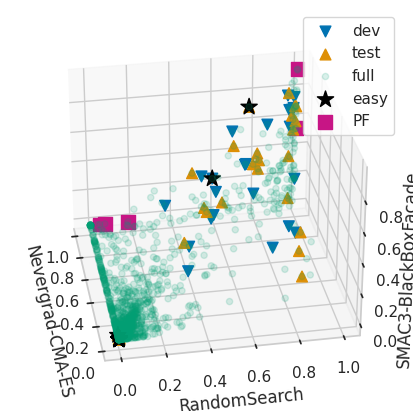

[10.  4.]
[10.  4.]


<Figure size 640x480 with 0 Axes>

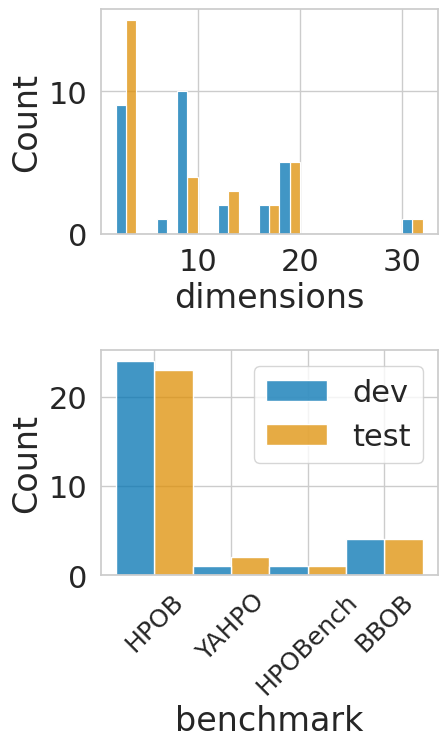

multi-fidelity {'path': PosixPath('data/MF/lognorm'), 'selected_subset_size': 20}
full set size 1857
[PosixPath('data/MF/lognorm/subset_100.csv'), PosixPath('data/MF/lognorm/subset_20.csv'), PosixPath('data/MF/lognorm/subset_30.csv'), PosixPath('data/MF/lognorm/subset_40.csv'), PosixPath('data/MF/lognorm/subset_50.csv'), PosixPath('data/MF/lognorm/subset_60.csv'), PosixPath('data/MF/lognorm/subset_70.csv'), PosixPath('data/MF/lognorm/subset_80.csv'), PosixPath('data/MF/lognorm/subset_90.csv'), PosixPath('data/MF/lognorm/subset_complement_subset_100.csv'), PosixPath('data/MF/lognorm/subset_complement_subset_20.csv'), PosixPath('data/MF/lognorm/subset_complement_subset_30.csv'), PosixPath('data/MF/lognorm/subset_complement_subset_40.csv'), PosixPath('data/MF/lognorm/subset_complement_subset_50.csv'), PosixPath('data/MF/lognorm/subset_complement_subset_60.csv'), PosixPath('data/MF/lognorm/subset_complement_subset_70.csv'), PosixPath('data/MF/lognorm/subset_complement_subset_80.csv'), Posi

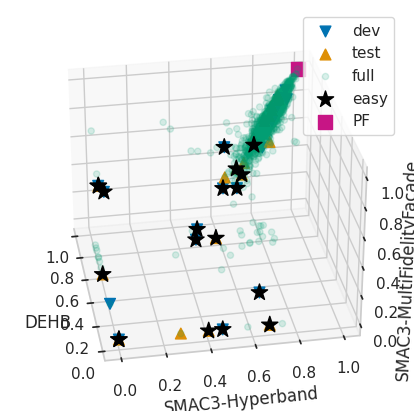

[10.  4.]
[10.  4.]


<Figure size 640x480 with 0 Axes>

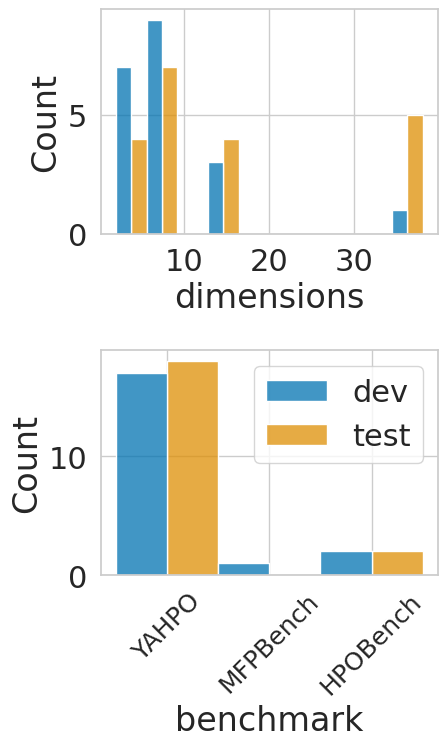

multi-objective {'path': PosixPath('data/MO/lognorm'), 'selected_subset_size': 10}
full set size 106
[PosixPath('data/MO/lognorm/subset_10.csv'), PosixPath('data/MO/lognorm/subset_20.csv'), PosixPath('data/MO/lognorm/subset_30.csv'), PosixPath('data/MO/lognorm/subset_40.csv'), PosixPath('data/MO/lognorm/subset_50.csv'), PosixPath('data/MO/lognorm/subset_complement_subset_10.csv'), PosixPath('data/MO/lognorm/subset_complement_subset_20.csv'), PosixPath('data/MO/lognorm/subset_complement_subset_30.csv'), PosixPath('data/MO/lognorm/subset_complement_subset_40.csv'), PosixPath('data/MO/lognorm/subset_complement_subset_5.csv'), PosixPath('data/MO/lognorm/subset_complement_subset_50.csv')]
multiobjective/10
['hpobench/MO/tab/ml/svm/146212', 'hpobench/MO/tab/ml/svm/146818', 'hpobench/MO/tab/ml/xgboost/14965', 'hpobench/MO/tab/ml/xgboost/167120', 'hpobench/MO/tab/ml/nn/146821', 'hpobench/MO/tab/ml/svm/7592']


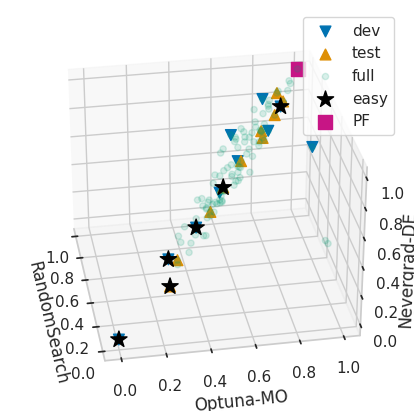

[10.  4.]
[10.  4.]


<Figure size 640x480 with 0 Axes>

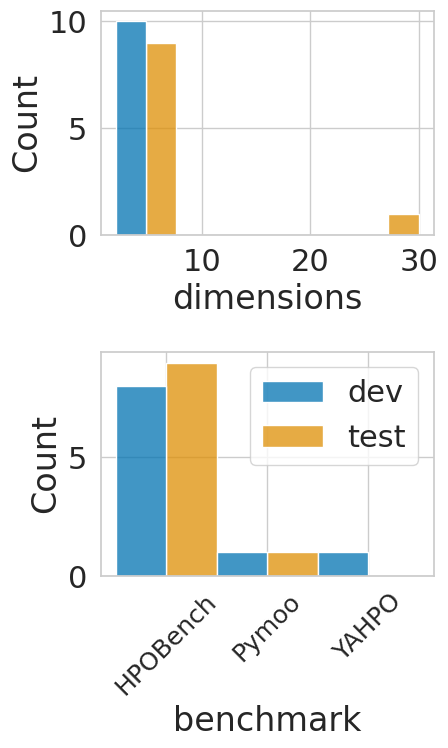

momf {'path': PosixPath('data/MOMF/lognorm'), 'selected_subset_size': 9}
full set size 27
[PosixPath('data/MOMF/lognorm/subset_10.csv'), PosixPath('data/MOMF/lognorm/subset_11.csv'), PosixPath('data/MOMF/lognorm/subset_12.csv'), PosixPath('data/MOMF/lognorm/subset_13.csv'), PosixPath('data/MOMF/lognorm/subset_5.csv'), PosixPath('data/MOMF/lognorm/subset_6.csv'), PosixPath('data/MOMF/lognorm/subset_7.csv'), PosixPath('data/MOMF/lognorm/subset_8.csv'), PosixPath('data/MOMF/lognorm/subset_9.csv'), PosixPath('data/MOMF/lognorm/subset_complement_subset_10.csv'), PosixPath('data/MOMF/lognorm/subset_complement_subset_11.csv'), PosixPath('data/MOMF/lognorm/subset_complement_subset_12.csv'), PosixPath('data/MOMF/lognorm/subset_complement_subset_13.csv'), PosixPath('data/MOMF/lognorm/subset_complement_subset_5.csv'), PosixPath('data/MOMF/lognorm/subset_complement_subset_6.csv'), PosixPath('data/MOMF/lognorm/subset_complement_subset_7.csv'), PosixPath('data/MOMF/lognorm/subset_complement_subset_8

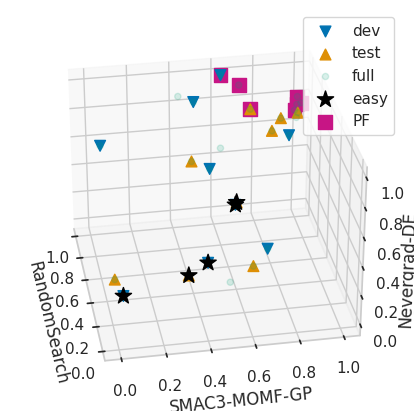

[10.  4.]
[10.  4.]


<Figure size 640x480 with 0 Axes>

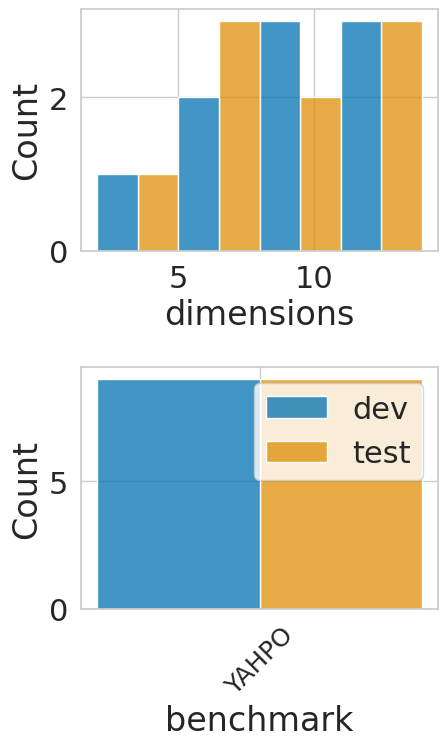

In [10]:
from carps.utils.pareto_front import pareto

mark_pareto = False

for scenario, _info in info.items():
    print(scenario, _info)
    path = _info["path"]
    selected_subset_size = _info["selected_subset_size"]

    figsize = (5,2)

    sns.set_theme(font_scale=1)
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")

    full_set = pd.read_csv(path / "df_crit.csv", index_col="problem_id")
    print("full set size", len(full_set))
    axes_labels = list(full_set.columns)
    subset_paths = [p for p in list(path.glob("subset*.csv")) if "complement" not in str(p)] + list(path.glob("subset_complement_subset_*.csv"))
    subset_paths.sort()
    print(subset_paths)
    ks = np.array([int(p.name.split(".")[0].split("_")[-1]) for p in subset_paths])
    ids = np.argsort(ks)
    subset_paths = np.array(subset_paths)[ids]
    ks = ks[ids]
    subsets = [pd.read_csv(p, index_col="problem_id") for p in subset_paths]

    factor = 2
    fig = plt.figure(figsize=(figsize[0]*factor, figsize[1]*factor), layout="constrained")
    ax = fig.add_subplot(111, projection='3d')


    for i, subset in enumerate(subsets):
        points = subset.to_numpy()
        if ks[i] == selected_subset_size:
            label = ks[i]
            if "complement" in str(subset_paths[i]):
                label = "test"
                marker = '^'
            else:
                label = "dev"
                marker = 'v'
            ax.scatter(points[:,0], points[:,1], points[:,2], label=label, marker=marker, alpha=1, s=60)

    points = full_set.to_numpy()
    ax.scatter(points[:,0], points[:,1], points[:,2], label="full", alpha=0.15, zorder=-1000)

    ax.set_xlabel(axes_labels[0])
    ax.set_ylabel(axes_labels[1])
    ax.set_zlabel(axes_labels[2])
    ax.zaxis.labelpad=-0.7

    

    ax.view_init(30,-10)
    # fig.set_tight_layout({"pad": 0.5}) 

    if Path("easy_tasks.csv").is_file():
        # Mark easy problems in plot
        # Easy as defined by visual inspection of the performance 
        # data gathered by all available optimizers run on the subsets dev and test
        # Conclusion: not every easy task lies in 000 or 111
        easy_tasks = pd.read_csv("easy_tasks.csv")
        easy_tasks = easy_tasks[easy_tasks["scenario"]==scenario]
        problem_ids = easy_tasks["problem_id"].to_list()
        prefix = f"{scenario.replace('-', '')}/{int(selected_subset_size)}"
        print(prefix)
        problem_ids = [p.replace(prefix, "") for p in problem_ids]
        problem_ids = [p.replace("bbob/", "") for p in problem_ids]
        print(problem_ids)
        points = full_set.loc[problem_ids].to_numpy()
        ax.scatter(points[:,0], points[:,1], points[:,2], label="easy", s=150, alpha=1, marker="*", color="black")

    if mark_pareto:
        points = full_set.to_numpy()
        points = points[pareto(-points)]
        ax.scatter(points[:,0], points[:,1], points[:,2], label="PF", s=100, alpha=1, marker="s", color="mediumvioletred")



    ax.xaxis.set_inverted(True) 

    ax.legend()

    savefig(fig, f"figures/{scenario}_selected_set")
    plt.show()
    plt.clf()
    prev_figsize = fig.get_size_inches()
    print(fig.get_size_inches())

    selected_problems = pd.concat([pd.DataFrame({
        "problem_id": list(subsets[i].index),
        "k": [ks[i]] * len(list(subsets[i].index)),
        "set": "test" if "complement" in str(subset_paths[i]) else "dev"
    }) for i in range(len(subsets))])
    selected_problems = selected_problems.sort_values(by="problem_id")
    selected_problems["problem_id"] = selected_problems["problem_id"].apply(lambda x: "bbob/" + x if x.startswith("noiseless") else x)
    selected_problems = maybe_postadd_task(selected_problems, overwrite=True)
    selected_problems["benchmark"] = add_benchmark_id(selected_problems["problem_id"])

    selected_problems.sort_values(by="set", inplace=True)

    sns.set_theme(font_scale=1)
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")

    # fig, ax = plt.subplots(figsize=(20,4))
    # ax = sns.histplot(data=selected_problems, x="problem_id", y="k", ax=ax)
    # ax.tick_params(axis="x", rotation=90, labelsize=6)
    # plt.show()

    sns.set_theme(font_scale=2)
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")


    figsize = prev_figsize
    print(figsize)
    fig = plt.figure(figsize=(figsize[0]*0.5, figsize[1]*2))
    axes = fig.subplots(nrows=2)

    ax = axes[0]
    ax = sns.histplot(data=selected_problems[selected_problems["k"]==selected_subset_size], x="task.dimensions", bins=selected_subset_size//2, hue="set", multiple="dodge", ax=ax)
    ax.set_xlabel("dimensions")
    ax.legend_.set_title(None)
    ax.get_legend().remove()

    ax = axes[1]
    ax = sns.histplot(data=selected_problems[selected_problems["k"]==selected_subset_size], x="benchmark", hue="set", multiple="dodge", ax=ax)
    ax.legend_.set_title(None)
    ax.tick_params(axis="x", rotation=45, labelsize=18)

    fig.set_tight_layout(True)
    savefig(fig, f"figures/{scenario}_selected_stats")
    plt.show()
